# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score


In [ ]:
#Proses pembacaan data dari Sumber
df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
df.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [ ]:
#drop data yang tidak diperlukan perlu
df=df.drop('no', axis = 1)
df.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [ ]:
#Menampilakn ukuran data
df.shape

(5000, 2)

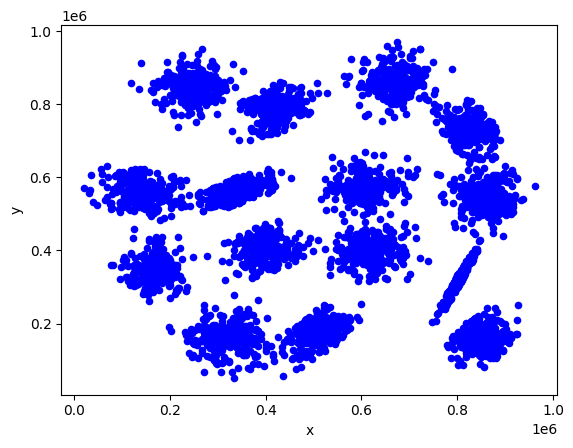

In [ ]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

#Output dari plotting langsung ditampilkan
%matplotlib inline
#Membuat scatter plot dari dua kolom data 'x' dan 'y'
ax1 = df.plot.scatter(x='x',y='y',c='Blue')

Sactter plot memperlihatkan bagaimana data 'x' dan 'y' tersebar. jika titik-titik data tersebar merata di eluruh plot, maka data cenderung homogen. jika ada pola tertentu atau titik-titik data berkumpul, itu bisa mengindikasikan pola atau struktur dalam data.


### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

In [ ]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas

#Import Library
from sklearn.cluster import KMeans
from sklearn import metrics
from warnings import filterwarnings as fw; fw('ignore')

#START CODE
#Inertia adalah pembuatan sebuah list kosong dengan nama
#Inertia yang akan digunakan untuk menyimpan nilai inersia untuk setiap nilai k (jumlah cluster) yang dicoba
inertia = []

#mencoba berbagau nilai k mulai dari 10 hingga 24
for k in range(10, 25): #setelah dilakukan percobaan, k terbaik adalah 15 jadi ambil di tengah tengah
  #Melakukan clustering pada data
  model = KMeans(n_clusters=k, random_state=42)
  #Melakukan clustering pada data menggunakan model K-Means yang telah dibuat
  #Setelah loop selesai dieksekusi, list inertia akan berisi nilai inertia untuk berbagai nilai k yang telah dicoba.
  model.fit(df)
  inertia.append(model.inertia_)
inertia
#END CODE

[34391481278674.81,
 28911073060127.125,
 23146756787307.777,
 18350029727191.914,
 13486733767168.459,
 8917615616867.258,
 8654195380138.777,
 8415631292726.098,
 8227282809930.557,
 8000004005435.432,
 7782061513020.172,
 7672183139126.995,
 7519773294441.791,
 7189455085478.642,
 7006296067332.918]

Jumlah cluster terbaik ada 15

Kode ini adalah langkah awal dalam mencari jumlah cluster terbaik(k) dengan menggunakan metode Elbow atau metode lainnya. Hasil nilai inertia ini dapat digunakan untuk menganalisis dan memilik jumlah cluster yang optimal untuk data yang sedang diolah.

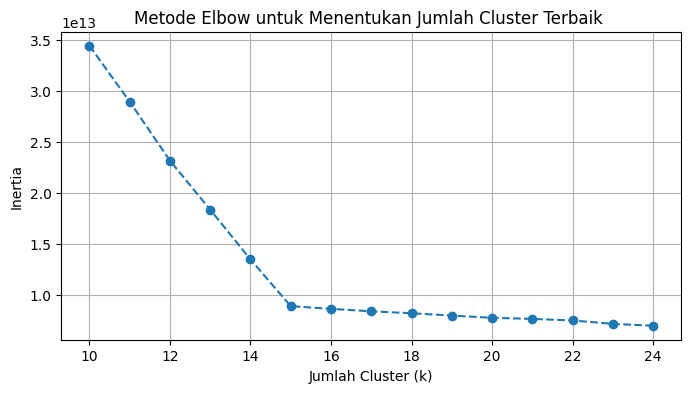

In [ ]:
#Plot nilai inertia

#ukuran grafik
plt.figure(figsize=(8, 4))
#Membuat plot garis pada grafik
plt.plot(range(10, 25), inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Terbaik ')
plt.grid(True)
plt.show()

- Sumbu x menunjukan jumlah cluster (k) yang dicoba dalam rentang 10 hingga 25. Setiap titik pada sumbu x mewakili jumlah cluster yang sedang diuji.
- Sumbu y menunjukan nilai inertia yang dihasilkan oleh algoritma K-Means untuk setiap nilai k. Nilai inertia adalah jumlah jarak kuadrat anara dat point dengan pusat cluster terdekat.
- Titik-titik pada grafik ditandai dengan marker 'o' (lingkaran) dan garis putus-putus ('--') yang menghubungkan titik-titik tersebut. Marker 'o' memungkinkan kita untuk melihat dengan jelas di mana titik data terletak pada grafik.

In [ ]:
#Import Library
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

#Jumlah cluster terbaik yang sudah ditentukan
best_K = 15
#Inisialisasi model K-Means dengan jumlah cluster terbaik
kmeans = KMeans(n_clusters=best_K, random_state=0)
#Melakukan clustering pada data
label = kmeans.fit_predict(df)
#Menghitung Silhouette Score
score = silhouette_score(df, label)
#Menampilkan hasil Silhouetter Score
print("Silhouette Score =", score)

Silhouette Score = 0.711278614093076


Jika silhouette Score adalah nilai positif, seperti dalam contoh (0.711278614093076), itu adalah indikasi bahwa clustering memiliki kualitas yang baik.

## Proses Visualisasi hasil CLuster

In [ ]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data
result = df.copy()

#START CODE
#Menambah kolom cluster
result['cluster'] = label
#Menampilkan 5 baris pertama dari data
result.head()
#END CODE

,x,y,cluster
0,664159,550946,10
1,665845,557965,10
2,597173,575538,10
3,618600,551446,10
4,635690,608046,10


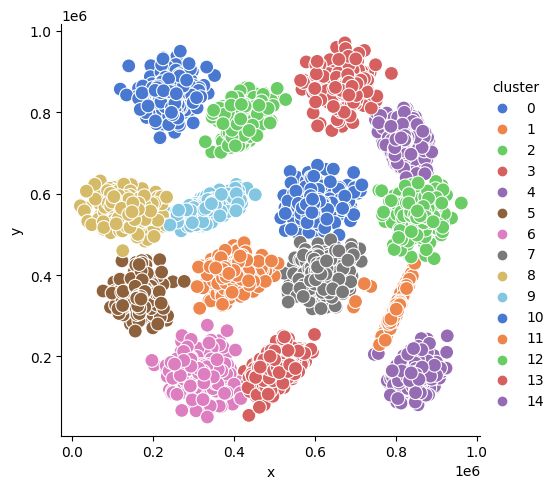

<Figure size 800x600 with 0 Axes>

In [ ]:
#Lakukan Plotting terhadap data
import seaborn as sns
import matplotlib.pyplot as plt

#START CODE
#Membuat scatter plot
sns.relplot(x='x', y='y', hue='cluster', data=result, palette='muted', s=100) #'s' mengatur ukuran marker
#Ukuran plot
plt.figure(figsize=(8, 6))
#Menampilkan plot
plt.show()
#END CODE

Dengan memanfaatkan scatter plot yang menggambarkan titik-titik data dengan warna yang berbeda sesuai dengan kelompoknya, kita dapat dengan cepat memvisualisasikan bagaimana data telah dikelompokkan. ini berguna untuk memahami pola dan distribusi data di setiap cluster.